In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot Example

This notebook demonstrates how to create bar plots using Seaborn's `barplot` function. Bar plots are useful for showing the relationship between a categorical variable and a continuous variable, typically displaying point estimates such as means or medians.

In [2]:
# Load the tips dataset from seaborn
df = sns.load_dataset("tips")

# Display the first few rows of the dataset to understand its structure
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Creating a Basic Bar Plot

The `barplot` function in Seaborn creates a bar plot with the following key parameters:

- `data`: The DataFrame containing the data
- `x`: The column name for the categorical variable (x-axis)
- `y`: The column name for the continuous variable (y-axis)
- `hue`: Variable that determines the color of bars (optional)
- `ci`: Confidence interval for error bars ('sd' for standard deviation, a number for percentile, or None)
- EDIT: ci --> errorbar

Below, we'll create a bar plot showing the average tip amount by day of the week, with separate bars for each gender.

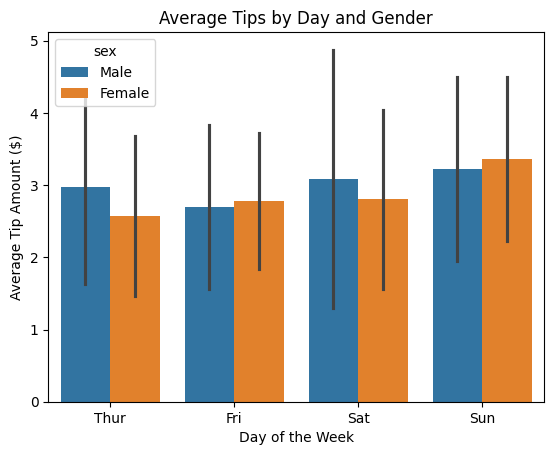

In [3]:
# Create a bar plot showing average tips by day and gender
sns.barplot(data=df, x="day", y="tip", errorbar="sd", hue="sex")
plt.title("Average Tips by Day and Gender")
plt.xlabel("Day of the Week")
plt.ylabel("Average Tip Amount ($)")
plt.show()

## Understanding Error Bars

By default, Seaborn's barplot shows 95% confidence intervals as error bars. We can customize this behavior using the `ci` parameter:

- `ci=95`: 95% confidence interval (default)
- `ci=68`: 68% confidence interval
- `ci='sd'`: Standard deviation
- `ci=None`: No error bars

Let's compare different types of error bars.

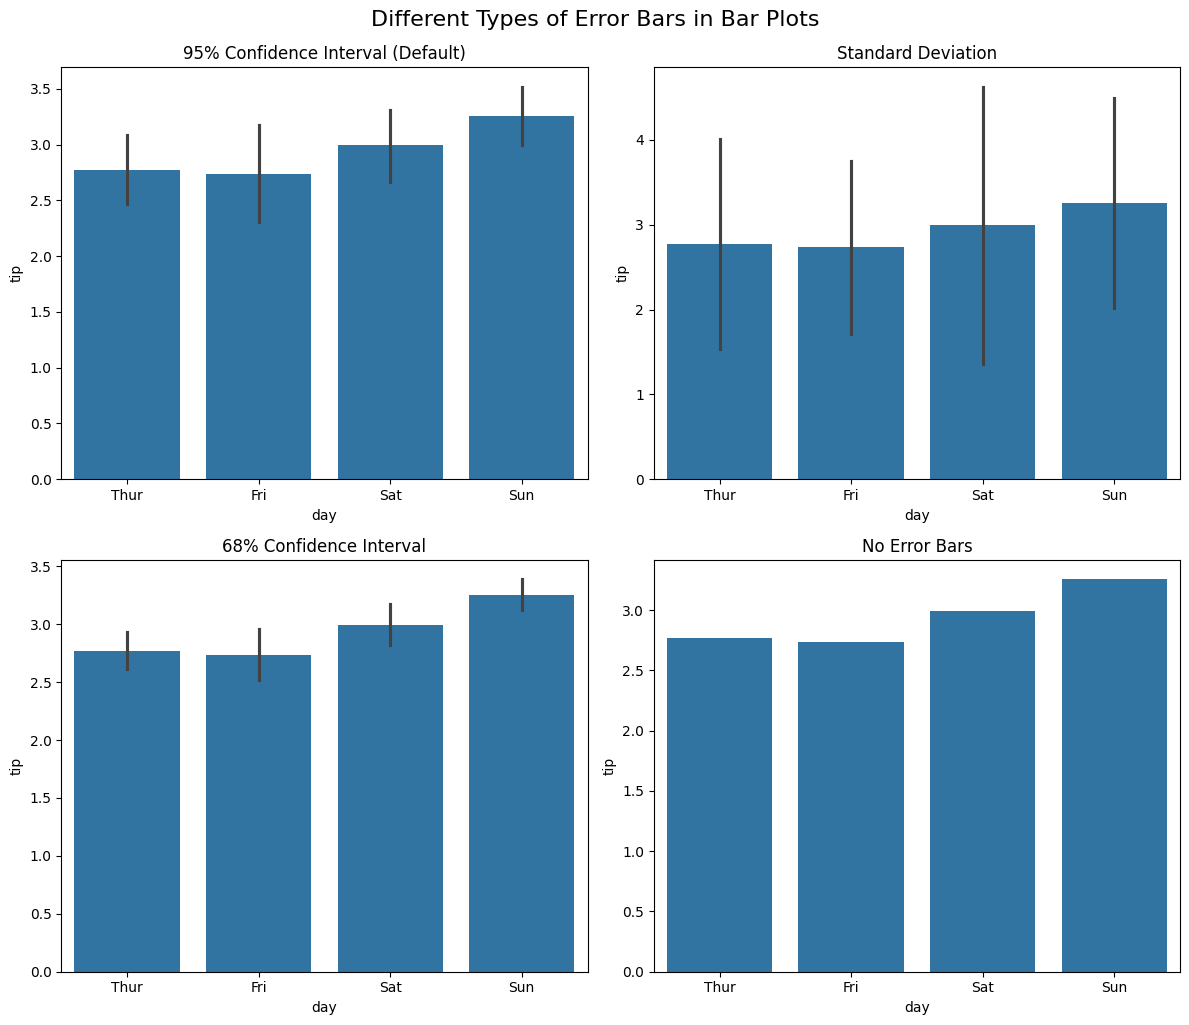

In [4]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar plot with 95% confidence interval (default)
sns.barplot(data=df, x="day", y="tip", ax=axes[0, 0])
axes[0, 0].set_title("95% Confidence Interval (Default)")

# Bar plot with standard deviation
sns.barplot(data=df, x="day", y="tip", errorbar="sd", ax=axes[0, 1])
axes[0, 1].set_title("Standard Deviation")

# Bar plot with 68% confidence interval
sns.barplot(data=df, x="day", y="tip", errorbar=('ci', 68), ax=axes[1, 0])
axes[1, 0].set_title("68% Confidence Interval")

# Bar plot with no error bars
sns.barplot(data=df, x="day", y="tip", errorbar=None, ax=axes[1, 1])
axes[1, 1].set_title("No Error Bars")

plt.tight_layout()
plt.suptitle("Different Types of Error Bars in Bar Plots", y=1.02, fontsize=16)
plt.show()

## Additional Customization Options

Seaborn's barplot function offers many customization options:

- `estimator`: Function to use for aggregating the data (default is mean)
- `order`: Order of the categorical variable levels
- `hue_order`: Order of the hue variable levels
- `palette`: Color palette to use
- `saturation`: Proportion of the original saturation to draw colors at

Let's create a more customized bar plot.

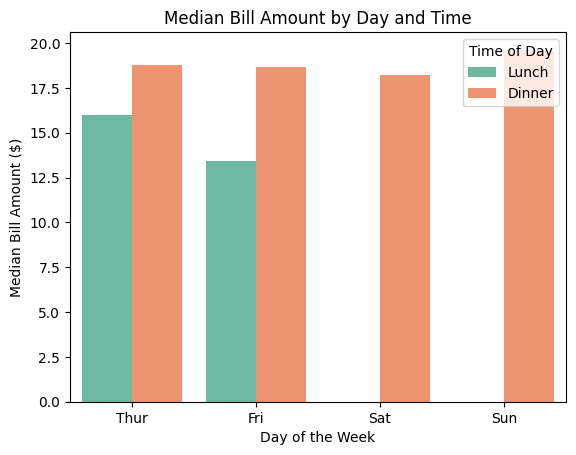

In [7]:
# Create a customized bar plot
sns.barplot(
    data=df, 
    x="day", 
    y="total_bill", 
    hue="time",  # Color bars by time (lunch/dinner)
    estimator=np.median,  # Use median instead of mean
    order=["Thur", "Fri", "Sat", "Sun"],  # Custom order of days
    palette="Set2",  # Use the Set2 color palette
    saturation=0.8,  # Slightly reduce color saturation
    errorbar=None  # No error bars
)

plt.title("Median Bill Amount by Day and Time")
plt.xlabel("Day of the Week")
plt.ylabel("Median Bill Amount ($)")
plt.legend(title="Time of Day")
plt.show()

## Horizontal Bar Plots

We can create horizontal bar plots by swapping the `x` and `y` parameters.

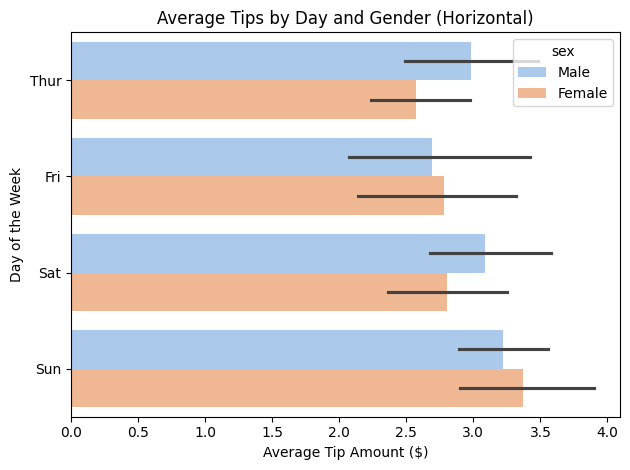

In [8]:
# Create a horizontal bar plot
sns.barplot(
    data=df, 
    y="day",  # Categorical variable on y-axis for horizontal bars
    x="tip",  # Continuous variable on x-axis
    hue="sex",
    palette="pastel"
)

plt.title("Average Tips by Day and Gender (Horizontal)")
plt.xlabel("Average Tip Amount ($)")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()